# Analisis Aerolínea

Info dataset : 

- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

## Analisis univariado

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Cargamos la data
flight = pd.read_csv("flight.csv")
flight['hours'] = flight['hours'].apply(lambda x : int(x))
print(flight.head(5))
print(flight.dtypes)


   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
miles                       int64
passengers                  

1. Distribución de los precios para los precios de tickets de "segunda clase". ¿Serán $500 un buen precio para estos tickets? 

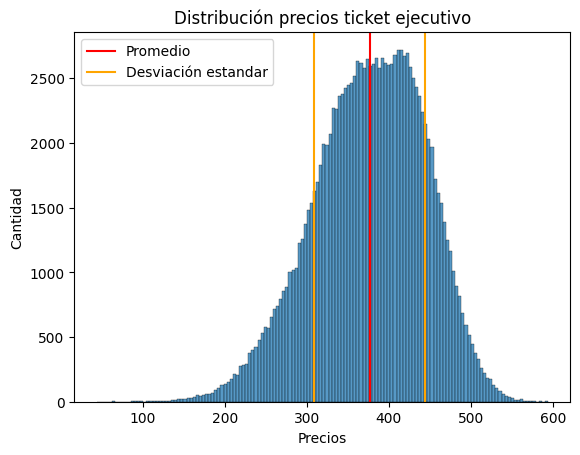

El precio promedio de los tickets de segunda clase es $376.59


In [5]:
## Distribución de los precios de ticket de segunda clase

sns.histplot(flight['coach_price'])
plt.axvline(flight['coach_price'].mean(),color = 'red',label = 'Promedio') #Promedio de precios
plt.axvline(flight['coach_price'].mean() - flight['coach_price'].std(),color = 'orange',label = 'Desviación estandar') #Desvest izquierda
plt.axvline(flight['coach_price'].mean() + flight['coach_price'].std(),color = 'orange') #Desvest derecha
plt.title('Distribución precios ticket ejecutivo')
plt.xlabel('Precios')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

## Promedio
precio_promedio = flight['coach_price'].mean()

print(f'El precio promedio de los tickets de segunda clase es ${round(precio_promedio,2)}')

2. Visualicemos y analicemos los precios de los ticket de segunda clase que duran 8 horas.

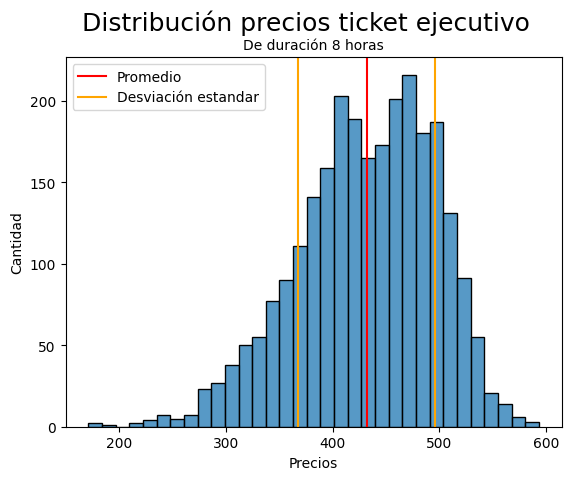

El precio promedio de los tickets de segunda clase es $431.83


In [6]:
## Filtrando dataset por tickets con vuelos exactamente 8 horas
tickets_8horas = flight[flight['hours'] == 8]

## Plot

sns.histplot(tickets_8horas['coach_price'])
plt.axvline(tickets_8horas['coach_price'].mean(),color = 'red', label = 'Promedio') #Promedio de precios
plt.axvline(tickets_8horas['coach_price'].mean() - tickets_8horas['coach_price'].std(),color = 'orange',label = 'Desviación estandar') #Desvest izquierda
plt.axvline(tickets_8horas['coach_price'].mean() + tickets_8horas['coach_price'].std(),color = 'orange') #Desvest derecha
plt.suptitle('Distribución precios ticket ejecutivo',fontsize = 18)
plt.title('De duración 8 horas', fontsize = 10)
plt.xlabel('Precios')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

## Promedio
precio_promedio2 = tickets_8horas['coach_price'].mean()

print(f'El precio promedio de los tickets de segunda clase es ${round(precio_promedio2,2)}')


3. Como estan distribuidos los retrasos de vuelo?

Rango datos: 1560
Promedio delay: 13.16
Mediana delay: 10.0
Desvest delay: 41.94168007146347


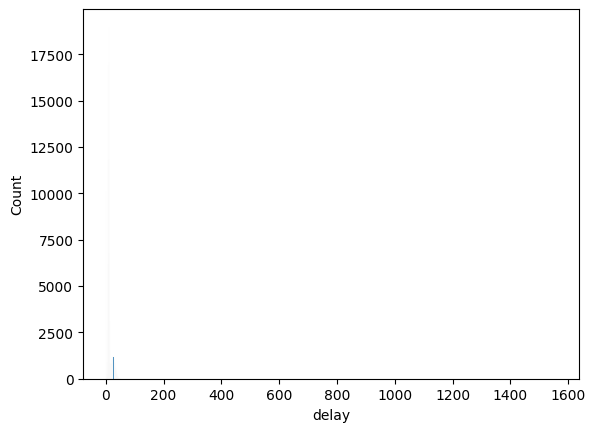

In [7]:
## Distribución de retrasos en el despegue/vuelo
## Chequiemos primero el rango
rango_delay = flight['delay'].max() - flight['delay'].min()
promedio_delay =  flight['delay'].mean()
mediana_delay = flight['delay'].median()
desvest_delay =  flight['delay'].std()
print(f'Rango datos: {rango_delay}')
print(f'Promedio delay: {round(promedio_delay,2)}')
print(f'Mediana delay: {mediana_delay}')
print(f'Desvest delay: {desvest_delay}')

sns.histplot(flight['delay'])
plt.show()



Al parecer hay valores outliers. ¿Es común que un delay de vuelo dure 1600 minutos (26 horas)?, para este analisis usaremos donde se concentra la mayoría de los datos. Antes de eso
probemos con un boxplot!

c:\Program Files\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delay'>

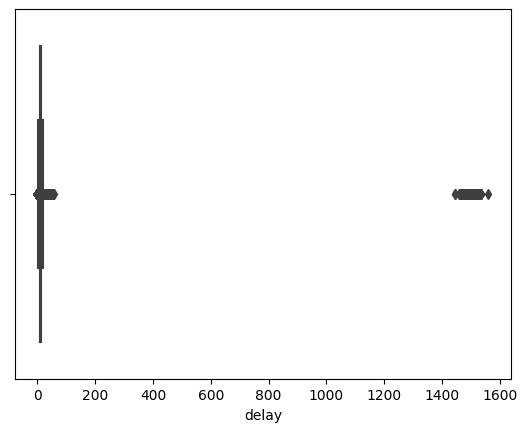

In [80]:
sns.boxplot(flight['delay'])
plt.show()

Nos muestra valores extremos entre 1400 y 1600, por lo que  para este analisis haremos un filtro de delay <=500

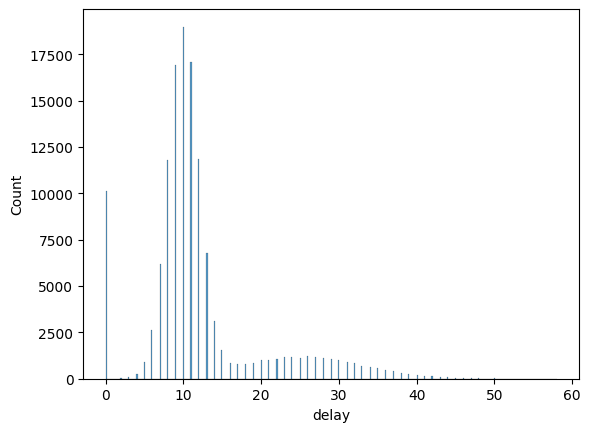

<Figure size 640x480 with 0 Axes>

In [83]:
sns.histplot(flight['delay'][flight['delay'] <= 500 ])
plt.show()
plt.clf()

Ahora sí, eliminando los outliers nos permite ver que es una ditribución con cola hacia la derecha. Podemos ver que la mayoría de los retrasos son alrededor de los 10 minutos!.

## Analisis Bivariado

4. En esta visualización se presenta la relación entre precios de segunda clase y primera clase. ¿Mientras asumente el precio de los de segunda clase, los de primera también seran mas caros?

c:\Program Files\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


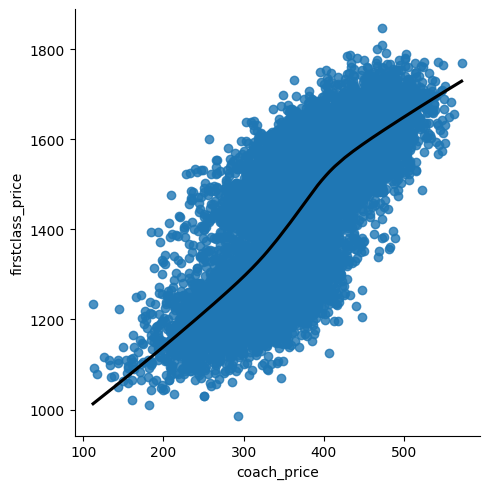

<Figure size 640x480 with 0 Axes>

In [2]:
## Obtenemos una muestra

porcentaje = 0.1
muestra_flight = flight.sample(n = int(flight.shape[0]*porcentaje))

## Ploteamos relacion entre vuelos de segunda clase y precios de primera clase

sns.lmplot('coach_price','firstclass_price',data=muestra_flight, line_kws={'color':'black'},lowess=True)

plt.show()
plt.clf()


Se observa una relación lineal entre coach_price y firstclass_price. Es decir, mientras aumentan los precios de ticket de segunda clase, más seran sus ticket de primera clase. (buuuu!)

5. Como se distribuuyen los precios de los precios segunda clase dependiendo si tiene wifi, entretenimiento o comidas?

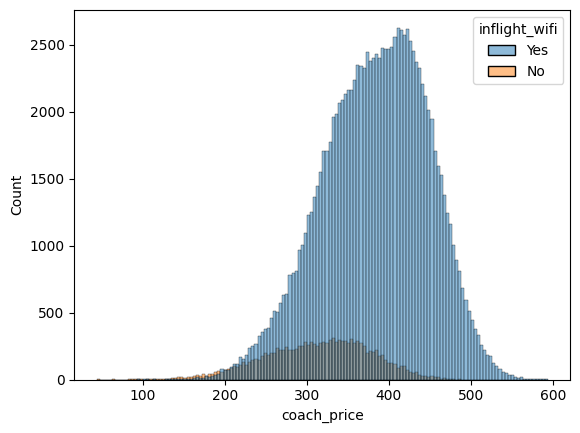

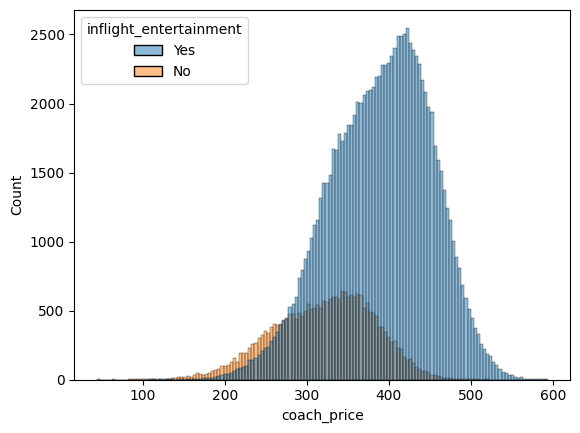

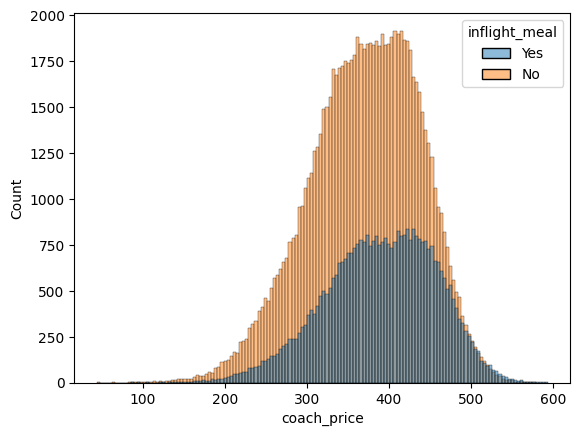

In [14]:
## Relación entre precio segunda clase y si tiene o no acceso a wifi, comidas, entretenimiento

sns.histplot(data = flight, x = 'coach_price', hue='inflight_wifi')

plt.show()
plt.clf()

sns.histplot(data = flight, x = 'coach_price', hue='inflight_entertainment')
plt.show()
plt.clf()

sns.histplot(data = flight, x = 'coach_price', hue='inflight_meal',hue_order=['Yes','No'])
plt.show()
plt.clf()

Podemos observar que cuando el pasaje tiene wifi, la distribución empieza a demostrar precios mas altos. Lo mismo con entretenimiento, en donde podemos ver que también la distribución se mueve hacia la derecha.
En cuaunto a si tiene comida o no podemos ver que los precios se mantienen casi iguales,y que la cantidad de vuelos que ofrecen comida vs los que no tienen, son casi la mitad de estos ultimos!.

6. Como cambia la cantidad de pasajeros en relación al largo del vuelo?

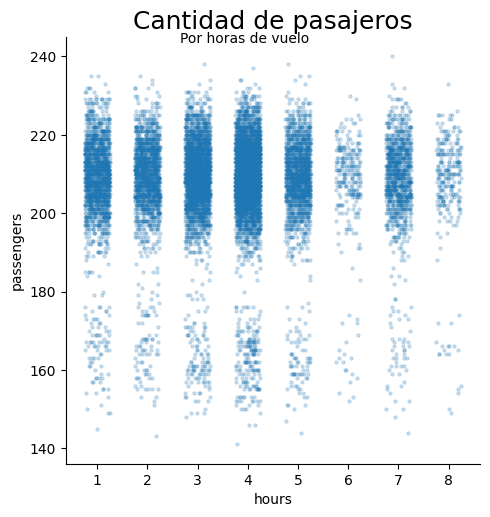

In [54]:
## En este caso estamos ploteando una variable continua vs una variable categorica!

sns.lmplot(data = muestra_flight, x = 'hours', y='passengers', x_jitter=0.25, fit_reg=False,
scatter_kws={'s':5,'alpha':0.2})
plt.suptitle('Por horas de vuelo',fontsize = 10)
plt.title('Cantidad de pasajeros', fontsize = 18)

plt.show()


Podemos observar que los vuelos entre 1 y 4 horas, la gran mayoría tiene alrededor de 200 pasajeros. Mientras que los vuelos entre 5 y 8 horas, tienen muy pocos vuelos con menos de 180 pasajeros!

7. Cual es la relacion entre los precios de primera y segunda clase por semana o fin de semana?

## Analisis Multivariado

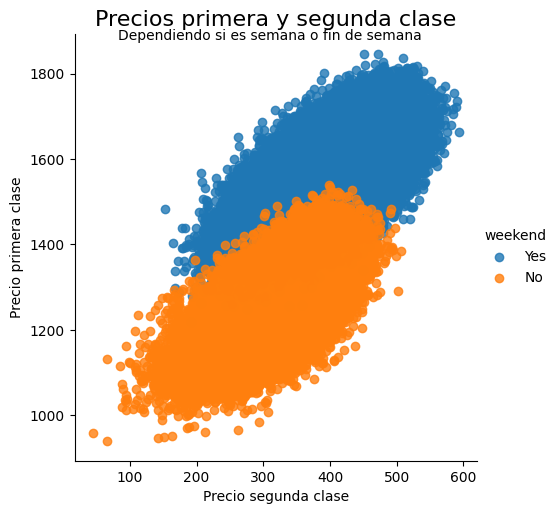

In [51]:
## Comparación entre precios de segunda y primera clase dependiendo si es día de semana o fin de semana

sns.lmplot(data = flight, x = 'coach_price', y='firstclass_price', hue='weekend', fit_reg=False)
plt.title('Precios primera y segunda clase', fontsize = 16)
plt.suptitle('Dependiendo si es semana o fin de semana',fontsize = 10)
plt.xlabel('Precio segunda clase')
plt.ylabel('Precio primera clase')

plt.show()


Se observa que los pecios de los vuelos son más caros durante los fin de semanas.

8. Como cambian los precios de segunda clase dependiendo si es un vuelo sobre noche por día de semana?

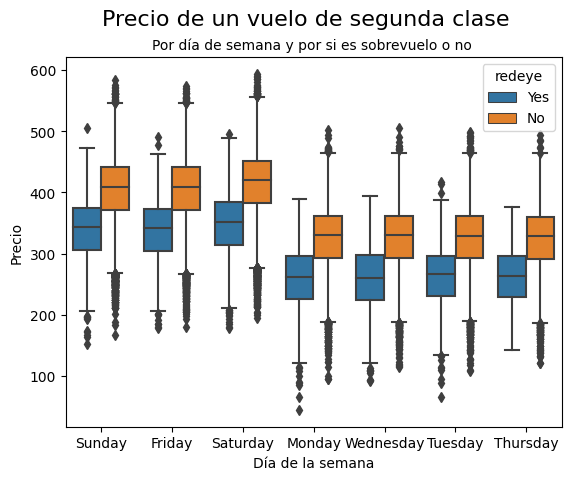

In [52]:
## Comparación promedio precios de segunda clase dependiendo si es vuelo sobre noche o no por cada día

sns.boxplot(data = flight, x = 'day_of_week', y = 'coach_price', hue = 'redeye')
plt.suptitle('Precio de un vuelo de segunda clase',fontsize = 16)
plt.title('Por día de semana y por si es sobrevuelo o no ', fontsize = 10)
plt.xlabel('Día de la semana')
plt.ylabel('Precio')

plt.show()




